[0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 2.04793750e+03
 2.04796875e+03 2.04800000e+03]
0.0
frequency spacing: 0.03125
sampling rate: 4096.0
Number of time samples: 1311
(1.239159203698031e-21-1.1086967316604042e-21j)
[ 0.          3.12433257  6.24866514 ... -9.37299771 -6.24866514
 -3.12433257]


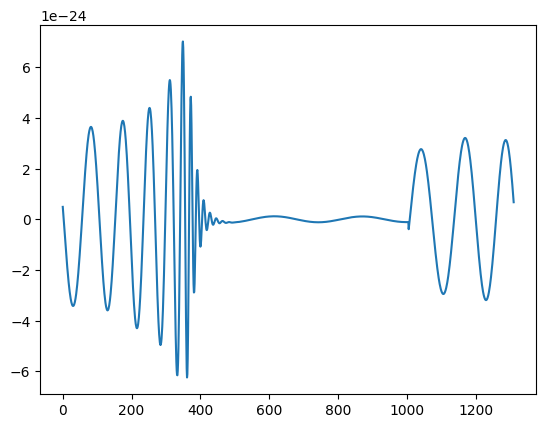

In [ ]:
#check frequencies of the tempalate

import matplotlib.pyplot as plt 

from constants import *
from template import *
from GW_class import *

#print template frequencies 
print(waveform.freqs)
print(waveform.freq_min)
#print frequency spacing
print('frequency spacing:', (waveform.df))
print('sampling rate:' ,(waveform.sampling_freq))
print('Number of time samples:', waveform.Nt)


#create time domain waveform
FD_template= waveform.get_FD_waveform(params_inj, phic=3.035)
TD_template= waveform.iFFT_waveform(FD_template)

#go back to FD to check freqs
TD_to_FD = np.fft.fft(TD_template)
freqs_from_TD = np.fft.fftfreq(len(TD_template), d=1/waveform.sampling_freq)

print(FD_template[513])

print(freqs_from_TD)

plt.plot(waveform.times, TD_template)



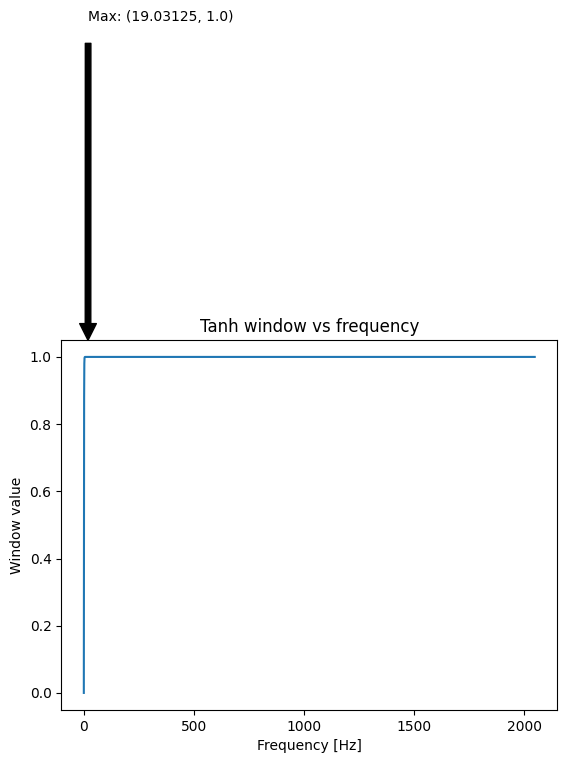

In [2]:
import matplotlib.pyplot as plt

max_index = np.argmax(waveform.tanh_window)
xmax = waveform.freqs[max_index]
ymax = waveform.tanh_window[max_index]

plt.annotate(f'Max: ({xmax}, {ymax})', xy=(xmax, ymax), xytext=(xmax + 0.5, ymax + 1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(waveform.freqs, waveform.tanh_window)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Window value")
plt.title("Tanh window vs frequency")
plt.show()

In [3]:
#check frequencies of GW150914

from get_data import *
from numpy.fft import rfftfreq, rfft

#choose detector 
det= 'H1'
#get time domain info from dictionary
dt = GW150914_data['dt']
fs = GW150914_data['fs']
strain = GW150914_data[det]['strain']
N = len(strain)

print('number of samples:', N)
print('sampling rate', fs)

#check frequency spacing
print('frequency spacing:', fs/N)
#fft to get freqs 
freqs_150914= rfftfreq(N,dt)
print(f'GW150914 frequencies:', freqs_150914)

#frequences greater than 16
freqs_150914_filter= freqs_150914[freqs_150914 >= 16]
print(f'frequencies greater than 16:', freqs_150914_filter)

number of samples: 131072
sampling rate 4096
frequency spacing: 0.03125
GW150914 frequencies: [0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 2.04793750e+03
 2.04796875e+03 2.04800000e+03]
frequencies greater than 16: [  16.        16.03125   16.0625  ... 2047.9375  2047.96875 2048.     ]


In [4]:
#double check with matched filter frequencies

from matched_filter import *
from constants import signal_ref_params

#choose detector
det= 'H1'

#check GW150914
SNRmax, timemax, d_eff, horizon, phase, offset = matched_filter(
    get_template(signal_ref_params['GW150914'][1], GW150914.dictionary),  
    GW150914.dictionary[det]['strain'],   
    GW150914.dictionary['time'],   
    GW150914.dictionary['large_data_psds'][det],      
    GW150914.dictionary['fs']        )

#print(datafreq)




